In [19]:
import plumed
import matplotlib.pyplot as plt
import mdtraj as md
import numpy

In [68]:
# import COLVAR file as pandas dataset
# set the right path to the COLVAR file
data=plumed.read_as_pandas("COLVAR1")
# print pandas dataset
data

<ipython-input-68-82ca8a85a88d>:3: UserWarning: cannot load PLUMED instance, conversions will not be available
  data=plumed.read_as_pandas("COLVAR1")


,time,phi,psi
0,0.0,0.972841,1.874093
1,100.0,-1.940584,2.588459
2,200.0,-2.752443,2.867369
3,300.0,1.297032,2.417742
4,400.0,-2.064682,-2.945604
...,...,...,...
996,99600.0,-2.167686,2.109021
997,99700.0,0.914925,2.095786
998,99800.0,-1.492440,2.995977
999,99900.0,2.851353,-0.893567


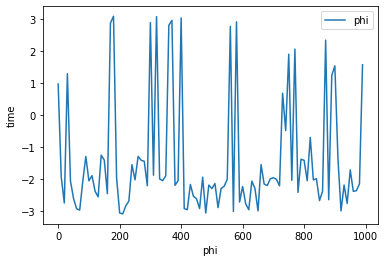

In [71]:
data.time,data.phi=data.time/10,data.phi[:100]
plt.plot(data.time,data.phi	, label="phi")
# x-y axis labels
plt.xlabel("phi")
plt.ylabel("time")
plt.legend()

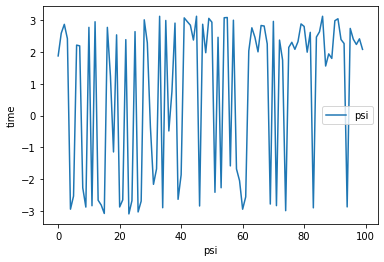

In [72]:
data.time,data.psi=data.time/10,data.psi[:100]
plt.plot(data.time,data.psi, label="psi")
# x-y axis labels
plt.xlabel("psi")

plt.ylabel("time")
plt.legend()

In [45]:
traj = md.load_xtc('traj_comp.xtc', top='confout.gro')
a,phi1 = md.compute_phi(traj)
b,psi1 = md.compute_psi(traj)

In [50]:
print(phi1)
len(phi1)

[[-1.2577688]
 [-2.7149851]
 [-2.3329206]
 ...
 [-2.5584257]
 [-2.4034297]
 [-2.6787438]]


100001

In [47]:
phi_standard=numpy.std(phi)

psi_standard=numpy.std(psi)

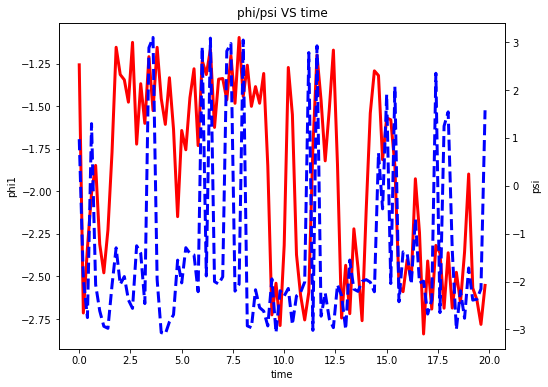

In [76]:
x_a = traj.time[:100]
y_a1 =phi1[:100]
y_a2 =data.phi[:100]
fig = plt.figure(num=3,figsize=(8,6),facecolor='w')
ax1 = fig.add_subplot(111)
ax1.plot(x_a, y_a1,'r',linewidth=3,linestyle='solid')
ax1.set_ylabel('phi1')
ax1.set_title("phi/psi VS time")
ax2 = ax1.twinx()  # this is the important function
ax2.plot(x_a, y_a2, 'b',linewidth=3,linestyle='dashed')#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
#ax2.set_xlim([0, np.e])
ax2.set_ylabel('psi')
ax1.set_xlabel('time')
plt.show()